# **PROYECTO CORTE N°1**
Luis Alejandro Gil González

Santiago Acosta Giraldo

Sergio Andres Botia Chona

# **ANALISIS EXPLORATORIO**

Antes de iniciar el preprocesamiento se realizó un análisis exploratorio inicial del dataset con el objetivo de comprender su estructura y definir el tipo de problema de clasificación.

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Dataset_ExamenesLaboratorio_ConsultaExterna_PatologíasRelacionadas_Obesidad_202405_202411.csv", sep=';')

df.head()

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,RED,IPRESS,ID_PACIENTE,EDAD_PACIENTE,SEXO_PACIENTE,...,FEC_RESULTADO_1,DIFERIMIENTO_1,PROCEDIMIENTO_1,RESULTADO_1,UNIDADES_1,FEC_RESULTADO_2,PROCEDIMIENTO_2,RESULTADO_2,UNIDADES_2,DIFERIMIENTO_2
0,20241204,LIMA,LIMA,MIRAFLORES,150122,RED ASISTENCIAL REBAGLIATI,H.III SUAREZ-ANGAMOS,eJwzNDSyNDe0MLcwNjM1NrI0MAAAH10DeQ==,64,FEMENINO,...,20240503,79,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",106.00,mg/dL,20240503,TRIGLICERIDOS,273.0,mg/dL,79
1,20241204,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA,130111,RED ASISTENCIAL LA LIBERTAD,POL. VICTOR LARCO HERRERA,eJwzNrS0NLAwM7YwsjAwNAACAB9eA2s=,9,MASCULINO,...,20240504,70,TRIGLICERIDOS,57.00,mg/dL,20240504,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",84.0,mg/dL,70
2,20241204,CAJAMARCA,JAEN,JAEN,60801,RED ASISTENCIAL JAEN,H.II JAEN,eJwzNDYzNjY3M7A0Njc0MLcwsAQAHyADeg==,47,FEMENINO,...,20240518,82,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",90.83,mg/dL,20240518,TRIGLICERIDOS,54.9,mg/dL,82
3,20241204,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,RED ASISTENCIAL ALMENARA,H.I AURELIO DIAZ-UFANO Y PERAL,eJwzNjQ1NjUztLCwNLA0MTE0MAAAH0oDdA==,12,FEMENINO,...,20240518,73,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",83.00,mg/dL,20240518,TRIGLICERIDOS,85.0,mg/dL,73
4,20241204,CALLAO,CALLAO,VENTANILLA,70106,RED ASISTENCIAL SABOGAL,CAP III HNA. MARIA DONROSE SUTMOLLER,eJwzNje0NLMwMjQwNTAwNzQwNwMAHyIDcA==,2,MASCULINO,...,20240513,61,TRIGLICERIDOS,170.00,mg/dL,20240513,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",113.0,mg/dL,61


Primero se verificó el número total de diagnósticos únicos presentes en la columna "DIAGNOSTICO", encontrando 9 clases diferentes. Posteriormente, se analizaron las frecuencias de cada diagnóstico para evaluar la distribución de las clases, identificando que algunas presentan mayor representación que otras, aunque el desbalance no es crítico.

In [ ]:
print("Dimensiones del dataset:")
print(df.shape)

print("\nInformación general:")
df.info()

Dimensiones del dataset:
(63799, 28)

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63799 entries, 0 to 63798
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FECHA_CORTE             63799 non-null  int64  
 1   DEPARTAMENTO            63799 non-null  object 
 2   PROVINCIA               63799 non-null  object 
 3   DISTRITO                63799 non-null  object 
 4   UBIGEO                  63799 non-null  int64  
 5   RED                     63799 non-null  object 
 6   IPRESS                  63799 non-null  object 
 7   ID_PACIENTE             63799 non-null  object 
 8   EDAD_PACIENTE           63799 non-null  int64  
 9   SEXO_PACIENTE           63799 non-null  object 
 10  EDAD_MEDICO             63799 non-null  int64  
 11  ID_MEDICO               63799 non-null  object 
 12  COD_DIAG                63799 non-null  object 
 13  DIAGNOSTICO             63799 no

In [ ]:
print("Columnas del dataset:")
print(df.columns)

Columnas del dataset:
Index(['FECHA_CORTE', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO', 'RED',
       'IPRESS', 'ID_PACIENTE', 'EDAD_PACIENTE', 'SEXO_PACIENTE',
       'EDAD_MEDICO', 'ID_MEDICO', 'COD_DIAG', 'DIAGNOSTICO',
       'AREA_HOSPITALARIA', 'SERVICIO_HOSPITALARIO', 'ACTIVIDAD_HOSPITALARIA',
       'FECHA_MUESTRA', 'FEC_RESULTADO_1', 'DIFERIMIENTO_1', 'PROCEDIMIENTO_1',
       'RESULTADO_1', 'UNIDADES_1', 'FEC_RESULTADO_2', 'PROCEDIMIENTO_2',
       'RESULTADO_2', 'UNIDADES_2', 'DIFERIMIENTO_2'],
      dtype='object')


In [ ]:
print("Cantidad de diagnósticos únicos:")
print(df['DIAGNOSTICO'].nunique())

print("\nTop 10 diagnósticos más frecuentes:")
print(df['DIAGNOSTICO'].value_counts().head(10))

Cantidad de diagnósticos únicos:
9

Top 10 diagnósticos más frecuentes:
DIAGNOSTICO
HIPOTIROIDISMO, NO ESPECIFICADO                       26004
OBESIDAD, NO ESPECIFICADA                             19688
SOBREPESO                                              9601
OBESIDAD DEBIDA A EXCESO DE CALORIAS                   7971
OTROS TIPOS DE OBESIDAD                                 444
CONSULTA PARA INSTRUCCION Y VIGILANCIA DE LA DIETA       48
OBESIDAD EXTREMA CON HIPOVENTILACION ALVEOLAR            23
OBESIDAD INDUCIDA POR DROGAS                             16
OTROS TRASTORNOS DE LA GLANDULA HIPOFISIS                 4
Name: count, dtype: int64


También se revisaron los valores nulos por columna, observando que solo existen 1 o 2 valores faltantes en algunas variables sobre un total de más de 63 mil registros, lo cual no representa un problema significativo.

In [ ]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
FECHA_CORTE               0
DEPARTAMENTO              0
PROVINCIA                 0
DISTRITO                  0
UBIGEO                    0
RED                       0
IPRESS                    0
ID_PACIENTE               0
EDAD_PACIENTE             0
SEXO_PACIENTE             0
EDAD_MEDICO               0
ID_MEDICO                 0
COD_DIAG                  0
DIAGNOSTICO               0
AREA_HOSPITALARIA         0
SERVICIO_HOSPITALARIO     0
ACTIVIDAD_HOSPITALARIA    0
FECHA_MUESTRA             0
FEC_RESULTADO_1           0
DIFERIMIENTO_1            0
PROCEDIMIENTO_1           0
RESULTADO_1               0
UNIDADES_1                0
FEC_RESULTADO_2           0
PROCEDIMIENTO_2           0
RESULTADO_2               0
UNIDADES_2                0
DIFERIMIENTO_2            0
dtype: int64


Con base en este análisis se determinó que el problema corresponde  a una clasificación multiclase con 9 categorías, por lo que el modelo MLP deberá tener una capa de salida con 9 neuronas y función de activación softmax, utilizando como métrica principal el accuracy.

# **1. PREPROCESAMIENTO DE LOS DATOS**

En esta etapa se realizó la limpieza del dataset eliminando valores nulos y columnas irrelevantes como identificadores y fechas.

In [ ]:
# Eliminación de registros con valores nulos
df = df.dropna()

print("Dimensiones del dataset después de eliminar nulos:")
print(df.shape)

Dimensiones del dataset después de eliminar nulos:
(63799, 28)


In [ ]:
columnas_eliminar = [
    'FECHA_CORTE',
    'UBIGEO',
    'RED',
    'IPRESS',
    'ID_PACIENTE',
    'ID_MEDICO',
    'FECHA_MUESTRA',
    'FEC_RESULTADO_1',
    'FEC_RESULTADO_2'
]

df = df.drop(columns=columnas_eliminar)

print("Columnas restantes:")
print(df.columns)

Columnas restantes:
Index(['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'EDAD_PACIENTE',
       'SEXO_PACIENTE', 'EDAD_MEDICO', 'COD_DIAG', 'DIAGNOSTICO',
       'AREA_HOSPITALARIA', 'SERVICIO_HOSPITALARIO', 'ACTIVIDAD_HOSPITALARIA',
       'DIFERIMIENTO_1', 'PROCEDIMIENTO_1', 'RESULTADO_1', 'UNIDADES_1',
       'PROCEDIMIENTO_2', 'RESULTADO_2', 'UNIDADES_2', 'DIFERIMIENTO_2'],
      dtype='object')


Posteriormente, se codificó la variable objetivo utilizando LabelEncoder para convertir los diagnósticos en valores numéricos. Las variables categóricas fueron transformadas mediante One-Hot Encoding, permitiendo su uso en el modelo de red neuronal.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['DIAGNOSTICO'] = le.fit_transform(df['DIAGNOSTICO'])

print("Clases codificadas:")
print(le.classes_)

Clases codificadas:
['CONSULTA PARA INSTRUCCION Y VIGILANCIA DE LA DIETA'
 'HIPOTIROIDISMO, NO ESPECIFICADO' 'OBESIDAD DEBIDA A EXCESO DE CALORIAS'
 'OBESIDAD EXTREMA CON HIPOVENTILACION ALVEOLAR'
 'OBESIDAD INDUCIDA POR DROGAS' 'OBESIDAD, NO ESPECIFICADA'
 'OTROS TIPOS DE OBESIDAD' 'OTROS TRASTORNOS DE LA GLANDULA HIPOFISIS'
 'SOBREPESO']


In [ ]:
X = df.drop(columns=['DIAGNOSTICO', 'COD_DIAG'])
y = df['DIAGNOSTICO']

print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

Dimensiones de X: (63799, 17)
Dimensiones de y: (63799,)


Finalmente, se aplicó estandarización a las variables predictoras con el fin
de mejorar la estabilidad y eficiencia del entrenamiento del modelo MLP.

In [ ]:
X = pd.get_dummies(X, drop_first=True)

print("Dimensiones después de One-Hot Encoding:")
print(X.shape)

Dimensiones después de One-Hot Encoding:
(63799, 377)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Datos escalados correctamente.")

Datos escalados correctamente.


# **2. DISTRIBUICIÓN DE LOS DATOS**

Se realizó una división del dataset utilizando una estrategia 70%-15%-15%.
El 70% de los datos se destinó para entrenamiento del modelo, el 15% para
validación durante el ajuste de hiperparámetros y el 15% restante para la
evaluación final del modelo. Se utilizó random_state=42 para garantizar
reproducibilidad en los resultados y se aplicó aleatorización para evitar
sesgos en la distribución de las clases.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled,
    y,
    test_size=0.30,
    random_state=42,
    shuffle=True
)

print("Train shape:", X_train.shape)
print("Temp shape:", X_temp.shape)

Train shape: (44659, 377)
Temp shape: (19140, 377)


In [ ]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,
    random_state=42
)

print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Validation shape: (9570, 377)
Test shape: (9570, 377)


In [ ]:
print("Total muestras:", len(X_scaled))
print("Entrenamiento:", len(X_train))
print("Validación:", len(X_val))
print("Prueba:", len(X_test))

Total muestras: 63799
Entrenamiento: 44659
Validación: 9570
Prueba: 9570


# **3. MODELO IMPLEMENTADO (MLP)**

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

num_clases = len(set(y))
print("Número de clases:", num_clases)

Número de clases: 9


Se implementó un modelo MLP con dos capas ocultas de 64 y 32 neuronas
respectivamente, utilizando la función de activación ReLU. En la capa
de salida se emplearon 9 neuronas (una por cada clase) con activación
Softmax, adecuada para clasificación multiclase

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_clases, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        24,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,569 (103.79 KB)

 Trainable params: 26,569 (103.79 KB)

 Non-trainable params: 0 (0.00 B)

Se utilizó el optimizador Adam y la función de pérdida sparse_categorical_crossentropy. El modelo fue entrenado durante 50 épocas con un tamaño de lote de 32 muestras.

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32
)

Epoch 1/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5358 - loss: 1.1966 - val_accuracy: 0.6187 - val_loss: 0.9402
Epoch 2/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6247 - loss: 0.9179 - val_accuracy: 0.6317 - val_loss: 0.9062
Epoch 3/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6418 - loss: 0.8748 - val_accuracy: 0.6345 - val_loss: 0.8949
Epoch 4/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6460 - loss: 0.8618 - val_accuracy: 0.6396 - val_loss: 0.8848
Epoch 5/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6553 - loss: 0.8351 - val_accuracy: 0.6409 - val_loss: 0.8796
Epoch 6/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6583 - loss: 0.8236 - val_accuracy: 0.6484 - val_loss: 0.8648
Epoch 7/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6624 - loss: 0.8114 - val_accuracy: 0.6484 - val_loss: 0.8613
Epoch 8/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6664 - loss: 0.8019 - 

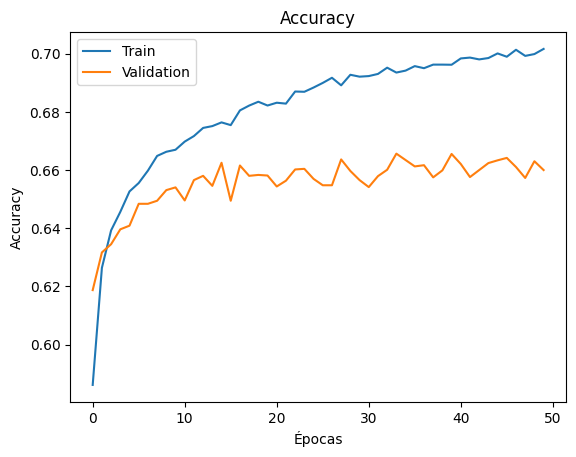

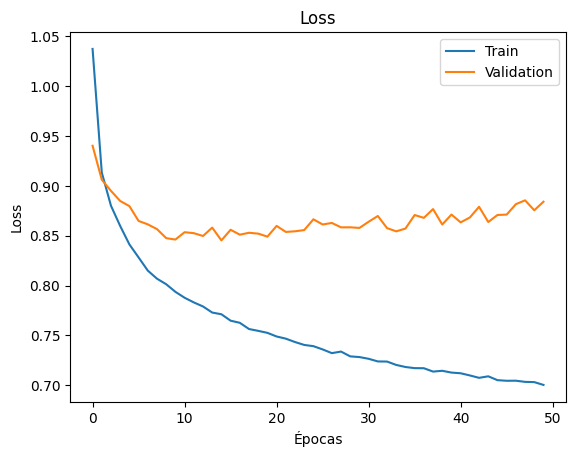

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# **4. SELECCIÓN Y AJUSTE DE HIPERPARAMETROS**

Se evaluaron diferentes configuraciones del modelo MLP variando el número de neuronas y la tasa de aprendizaje (learning rate). El objetivo fue identificar la arquitectura que ofrece mejor desempeño en el conjunto de validación.

In [ ]:
def crear_modelo(neuronas1=64, neuronas2=32, learning_rate=0.001):

    model = Sequential([
        Dense(neuronas1, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(neuronas2, activation='relu'),
        Dense(num_clases, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

La selección final del modelo se realizó comparando el accuracy obtenido en validación, priorizando estabilidad y menor sobreajuste.

In [ ]:
modelo_1 = crear_modelo(64, 32, 0.001)

history_1 = modelo_1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5488 - loss: 1.2133 - val_accuracy: 0.6248 - val_loss: 0.9384
Epoch 2/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6255 - loss: 0.9243 - val_accuracy: 0.6309 - val_loss: 0.9093
Epoch 3/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6330 - loss: 0.8867 - val_accuracy: 0.6319 - val_loss: 0.8960
Epoch 4/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6482 - loss: 0.8591 - val_accuracy: 0.6438 - val_loss: 0.8798
Epoch 5/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6522 - loss: 0.8413 - val_accuracy: 0.6488 - val_loss: 0.8679
Epoch 6/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6639 - loss: 0.8162 - val_accuracy: 0.6503 - val_loss: 0.8639
Epoch 7/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6659 - loss: 0.8067 - val_accuracy: 0.6376 - val_loss: 0.8740
Epoch 8/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6625 - loss: 0.8042 - 

In [ ]:
modelo_2 = crear_modelo(128, 64, 0.001)

history_2 = modelo_2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5502 - loss: 1.1466 - val_accuracy: 0.6146 - val_loss: 0.9413
Epoch 2/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6252 - loss: 0.9080 - val_accuracy: 0.6264 - val_loss: 0.9022
Epoch 3/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6404 - loss: 0.8725 - val_accuracy: 0.6339 - val_loss: 0.8879
Epoch 4/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6461 - loss: 0.8439 - val_accuracy: 0.6422 - val_loss: 0.8651
Epoch 5/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6572 - loss: 0.8159 - val_accuracy: 0.6361 - val_loss: 0.8708
Epoch 6/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6590 - loss: 0.8030 - val_accuracy: 0.6483 - val_loss: 0.8650
Epoch 7/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6717 - loss: 0.7912 - val_accuracy: 0.6471 - val_loss: 0.8532
Epoch 8/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6691 - loss: 0.7772 - 

In [ ]:
modelo_3 = crear_modelo(64, 32, 0.0001)

history_3 = modelo_3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3453 - loss: 1.7333 - val_accuracy: 0.5674 - val_loss: 1.1112
Epoch 2/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5806 - loss: 1.0578 - val_accuracy: 0.6011 - val_loss: 1.0094
Epoch 3/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6045 - loss: 0.9840 - val_accuracy: 0.6089 - val_loss: 0.9742
Epoch 4/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6213 - loss: 0.9381 - val_accuracy: 0.6157 - val_loss: 0.9563
Epoch 5/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6258 - loss: 0.9248 - val_accuracy: 0.6200 - val_loss: 0.9458
Epoch 6/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6297 - loss: 0.9173 - val_accuracy: 0.6224 - val_loss: 0.9362
Epoch 7/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6357 - loss: 0.9006 - val_accuracy: 0.6277 - val_loss: 0.9319
Epoch 8/50
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6371 - loss: 0.8952 - 

In [ ]:
print("Modelo 1 - Val Accuracy final:", history_1.history['val_accuracy'][-1])
print("Modelo 2 - Val Accuracy final:", history_2.history['val_accuracy'][-1])
print("Modelo 3 - Val Accuracy final:", history_3.history['val_accuracy'][-1])

Modelo 1 - Val Accuracy final: 0.6631138920783997
Modelo 2 - Val Accuracy final: 0.6504701972007751
Modelo 3 - Val Accuracy final: 0.6537095308303833


Tras evaluar diferentes configuraciones del modelo MLP, se seleccionó el Modelo 1 (64-32 neuronas, learning rate = 0.001), ya que obtuvo el mayor accuracy en el conjunto de validación (66.31%).

#**5. EVALUACIÓN FINAL DEL MODELO**

El modelo seleccionado fue evaluado utilizando el conjunto de prueba, el cual no fue utilizado durante el entrenamiento ni la validación, permitiendo obtener una estimación imparcial del rendimiento del modelo.

In [ ]:
test_loss, test_accuracy = modelo_1.evaluate(X_test, y_test)

print("Loss en Test:", test_loss)
print("Accuracy en Test:", test_accuracy)

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6491 - loss: 0.9199
Loss en Test: 0.8911605477333069
Accuracy en Test: 0.6601880788803101


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predicciones
y_pred = modelo_1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

print("Matriz de Confusión:")
print(cm)

300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Matriz de Confusión:
[[   2    0    0    0    0    1    0    0    1]
 [   0 3142  132    0    0  515    6    0  107]
 [   1  312  568    0    0  159    3    0  118]
 [   0    3    1    0    0    1    0    0    0]
 [   0    1    1    0    0    2    0    0    0]
 [   0  672  132    1    0 1821    9    0  328]
 [   0   10    6    0    0   25   19    0    1]
 [   0    1    0    0    0    0    0    0    0]
 [   0  137  108    0    0  454    4    0  766]]


Se calculó el accuracy como métrica principal y se generó la matriz de confusión junto con el reporte de clasificación para analizar el desempeño por clase.

In [ ]:
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_classes))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.73      0.81      0.77      3902
           2       0.60      0.49      0.54      1161
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.61      0.61      0.61      2963
           6       0.46      0.31      0.37        61
           7       0.00      0.00      0.00         1
           8       0.58      0.52      0.55      1469

    accuracy                           0.66      9570
   macro avg       0.41      0.36      0.38      9570
weighted avg       0.65      0.66      0.66      9570



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


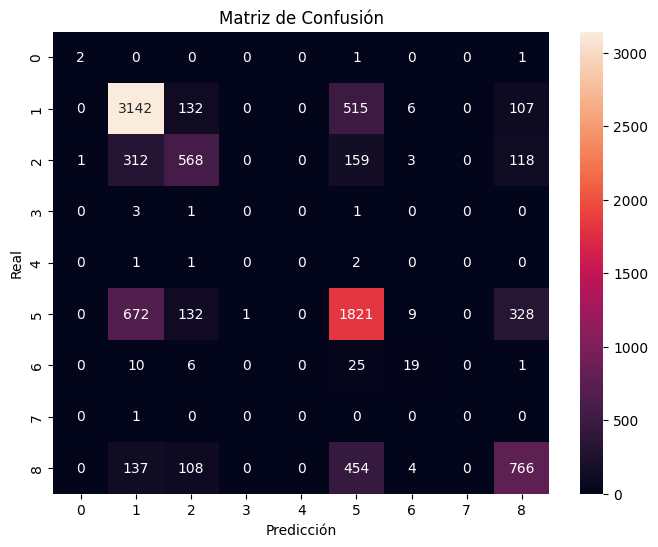

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_acc = balanced_accuracy_score(y_test, y_pred_classes)
print("Balanced Accuracy:", balanced_acc)

Balanced Accuracy: 0.3602177659806155


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_test_bin = label_binarize(y_test, classes=range(num_clases))

roc_auc = roc_auc_score(y_test_bin, y_pred, multi_class='ovr')
print("ROC-AUC Multiclase:", roc_auc)

ROC-AUC Multiclase: 0.7725879289064842


In [ ]:
print("Último accuracy train:", history_1.history['accuracy'][-1])
print("Último accuracy val:", history_1.history['val_accuracy'][-1])

Último accuracy train: 0.6995454430580139
Último accuracy val: 0.6631138920783997


In [ ]:
report = classification_report(y_test, y_pred_classes, output_dict=True)

for clase, valores in report.items():
    if clase.isdigit():
        print(f"Clase {clase} - F1-score:", valores['f1-score'])

Clase 0 - F1-score: 0.5714285714285714
Clase 1 - F1-score: 0.7682151589242053
Clase 2 - F1-score: 0.5386439070649597
Clase 3 - F1-score: 0.0
Clase 4 - F1-score: 0.0
Clase 5 - F1-score: 0.613028109745834
Clase 6 - F1-score: 0.37254901960784315
Clase 7 - F1-score: 0.0
Clase 8 - F1-score: 0.5491039426523298


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


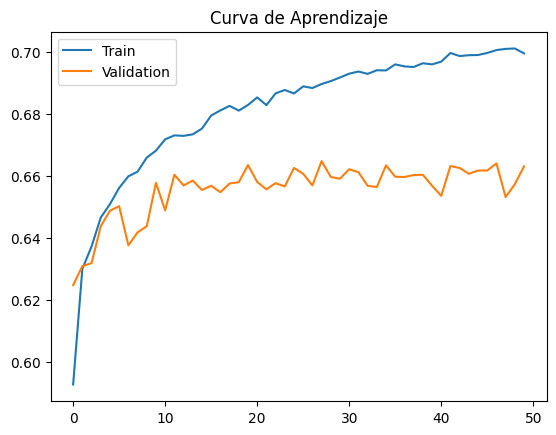

In [ ]:
plt.figure()
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title("Curva de Aprendizaje")
plt.legend(["Train", "Validation"])
plt.show()

In [ ]:
from sklearn.metrics import f1_score

f1_macro = f1_score(y_test, y_pred_classes, average='macro')
f1_weighted = f1_score(y_test, y_pred_classes, average='weighted')

print("F1 Macro:", f1_macro)
print("F1 Weighted:", f1_weighted)

F1 Macro: 0.379218745491527
F1 Weighted: 0.6552756856467752
